In [21]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os

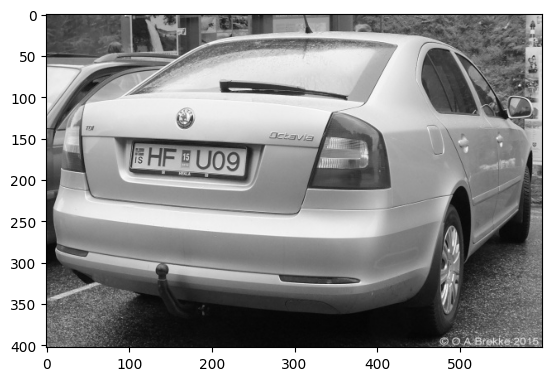

In [121]:
img=cv2.imread('C:/Users/vivek/Downloads/img12.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

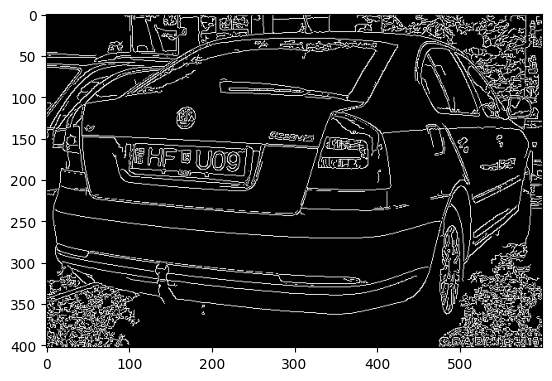

In [122]:
bfilter=cv2.bilateralFilter(gray,11,17,17)    #noise reduction
edged=cv2.Canny(bfilter,20,150)  #edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

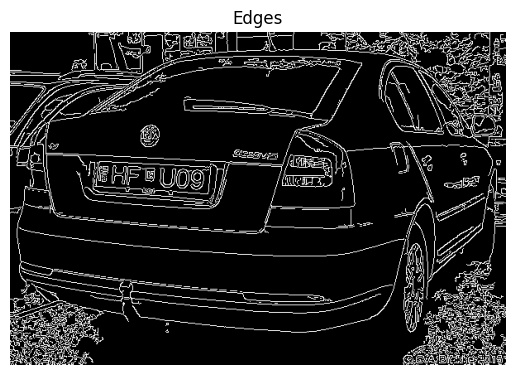

In [123]:

plt.imshow(edged,cmap='gray')
plt.title("Edges")
plt.axis("off")
plt.show()

In [124]:

keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [125]:
#Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)



Location:  [[[346 119]]

 [[404 143]]

 [[415 211]]

 [[315 209]]]


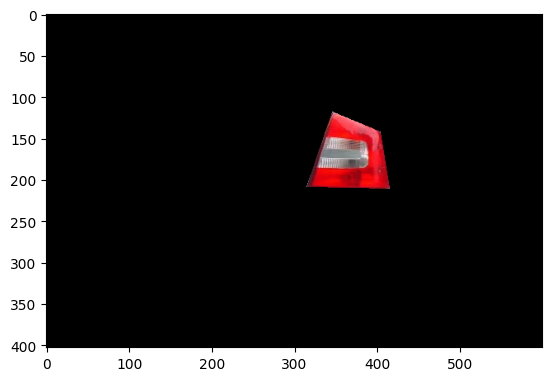

In [126]:
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image


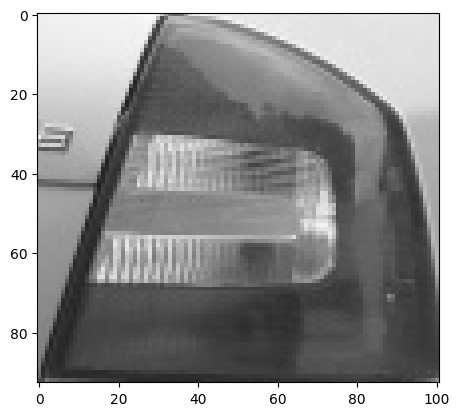

In [127]:

(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image


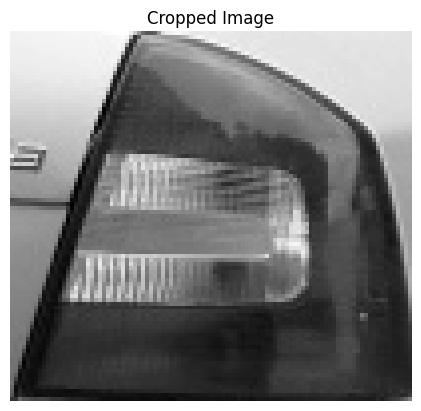

In [128]:

plt.imshow(cropped_image, cmap='gray')
plt.title("Cropped Image")
plt.axis("off")
plt.show()

In [89]:
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

In [90]:
text = result[0][-2] #Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX #Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text


IndexError: list index out of range